In [3]:
"""
===================================================================================
RFM ANALYSIS & CUSTOMER SEGMENTATION
===================================================================================
Project: Customer Segmentation using RFM Analysis
Author: Mausami Narayan
Date: February 2026
===================================================================================
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')

# Load our CLEAN data (no need to clean again!)
df = pd.read_csv('outputs/cleaned_retail_data.csv')

# Convert date column back to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

print("-" * 80)
print("RFM ANALYSIS - CUSTOMER SEGMENTATION")
print("-" * 80)
print(f" Clean data loaded!")
print(f" Transactions: {len(df):,}")
print(f" Customers: {df['CustomerID'].nunique():,}")

--------------------------------------------------------------------------------
RFM ANALYSIS - CUSTOMER SEGMENTATION
--------------------------------------------------------------------------------
 Clean data loaded!
 Transactions: 392,692
 Customers: 4,338


In [5]:
print("-" * 80)
print("WHAT IS RFM ANALYSIS?")
print("-" * 80)
print("""
RFM stands for:

R = RECENCY   → How recently did the customer buy?
                (Lower days = Better = Higher score)

F = FREQUENCY → How many times did they buy?
                (More purchases = Better = Higher score)

M = MONETARY  → How much money did they spend?
                (More money = Better = Higher score)

Each customer will get a score from 1-4 for each:
    4 = Best
    3 = Good  
    2 = Average
    1 = Poor

Example:
    Customer A: R=4, F=4, M=4 → CHAMPION customer! ⭐
    Customer B: R=1, F=1, M=1 → LOST customer 💀
    Customer C: R=4, F=1, M=1 → NEW customer 🆕
""")

--------------------------------------------------------------------------------
WHAT IS RFM ANALYSIS?
--------------------------------------------------------------------------------

RFM stands for:

R = RECENCY   → How recently did the customer buy?
                (Lower days = Better = Higher score)

F = FREQUENCY → How many times did they buy?
                (More purchases = Better = Higher score)

M = MONETARY  → How much money did they spend?
                (More money = Better = Higher score)

Each customer will get a score from 1-4 for each:
    4 = Best
    3 = Good  
    2 = Average
    1 = Poor

Example:
    Customer A: R=4, F=4, M=4 → CHAMPION customer! ⭐
    Customer B: R=1, F=1, M=1 → LOST customer 💀
    Customer C: R=4, F=1, M=1 → NEW customer 🆕



In [7]:
print("-" * 80)
print("STEP 1: SET REFERENCE DATE")
print("-" * 80)

# Reference date = 1 day after last transaction
# This is the "today" for our analysis
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

print(f"Last transaction in dataset: {df['InvoiceDate'].max()}")
print(f"Reference date (our 'today'): {reference_date}")
print("""
💡 WHY DO WE NEED A REFERENCE DATE?
   To calculate RECENCY, we need to know:
   "How many days since last purchase?"
   
   We use the day AFTER the last transaction
   as our reference point.
   
   Example: If customer last bought on Dec 1st
   and reference date is Dec 10th,
   their Recency = 9 days
""")

--------------------------------------------------------------------------------
STEP 1: SET REFERENCE DATE
--------------------------------------------------------------------------------
Last transaction in dataset: 2011-12-09 12:50:00
Reference date (our 'today'): 2011-12-10 12:50:00

💡 WHY DO WE NEED A REFERENCE DATE?
   To calculate RECENCY, we need to know:
   "How many days since last purchase?"
   
   We use the day AFTER the last transaction
   as our reference point.
   
   Example: If customer last bought on Dec 1st
   and reference date is Dec 10th,
   their Recency = 9 days



In [13]:
print("-" * 80)
print("STEP 2: CALCULATE RFM VALUES")
print("-" * 80)

# Calculate RFM for each customer
rfm = df.groupby('CustomerID').agg({
    
    # RECENCY: Days since last purchase
    # We take the MAX date (most recent purchase)
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    
    # FREQUENCY: Number of unique invoices
    # Each invoice = one shopping trip
    'InvoiceNo': 'nunique',
    
    # MONETARY: Total amount spent
    'TotalAmount': 'sum'
    
}).reset_index()

# Rename columns to be clear
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Round monetary to 2 decimal places
rfm['Monetary'] = rfm['Monetary'].round(2)

print(" RFM values calculated!")
print(f"\nShape: {rfm.shape}")
print("\nFirst 10 customers:")
print(rfm.head(10))

print("""
   WHAT DO THESE NUMBERS MEAN?
   Recency   = Days since last purchase (lower = better)
   Frequency = Number of orders placed (higher = better)
   Monetary  = Total £ spent (higher = better)
""")

--------------------------------------------------------------------------------
STEP 2: CALCULATE RFM VALUES
--------------------------------------------------------------------------------
 RFM values calculated!

Shape: (4338, 4)

First 10 customers:
   CustomerID  Recency  Frequency  Monetary
0       12346      326          1  77183.60
1       12347        2          7   4310.00
2       12348       75          4   1797.24
3       12349       19          1   1757.55
4       12350      310          1    334.40
5       12352       36          8   2506.04
6       12353      204          1     89.00
7       12354      232          1   1079.40
8       12355      214          1    459.40
9       12356       23          3   2811.43

   WHAT DO THESE NUMBERS MEAN?
   Recency   = Days since last purchase (lower = better)
   Frequency = Number of orders placed (higher = better)
   Monetary  = Total £ spent (higher = better)



In [17]:
print("-" * 80)
print("STEP 3: RFM STATISTICS")
print("-" * 80)

print(rfm[['Recency', 'Frequency', 'Monetary']].describe().round(2))

print(f"""
KEY INSIGHTS FROM STATISTICS:

Recency:
   Average: {rfm['Recency'].mean():.0f} days since last purchase
   Best customer: {rfm['Recency'].min()} days ago
   Worst: {rfm['Recency'].max()} days ago

Frequency:
   Average: {rfm['Frequency'].mean():.1f} orders per customer
   Most loyal: {rfm['Frequency'].max()} orders!
   One-time buyers: {(rfm['Frequency']==1).sum():,} customers

Monetary:
   Average spend: £{rfm['Monetary'].mean():,.2f}
   Top spender: £{rfm['Monetary'].max():,.2f}
   Lowest spender: £{rfm['Monetary'].min():,.2f}
""")

--------------------------------------------------------------------------------
STEP 3: RFM STATISTICS
--------------------------------------------------------------------------------
       Recency  Frequency   Monetary
count  4338.00    4338.00    4338.00
mean     92.54       4.27    2048.69
std     100.01       7.70    8985.23
min       1.00       1.00       3.75
25%      18.00       1.00     306.48
50%      51.00       2.00     668.57
75%     142.00       5.00    1660.60
max     374.00     209.00  280206.02

KEY INSIGHTS FROM STATISTICS:

Recency:
   Average: 93 days since last purchase
   Best customer: 1 days ago
   Worst: 374 days ago

Frequency:
   Average: 4.3 orders per customer
   Most loyal: 209 orders!
   One-time buyers: 1,493 customers

Monetary:
   Average spend: £2,048.69
   Top spender: £280,206.02
   Lowest spender: £3.75



In [21]:
print("-" * 80)
print("STEP 4: ASSIGN RFM SCORES (1-4)")
print("-" * 80)

# We use QUARTILES to divide customers into 4 equal groups
# pd.qcut divides data into equal-sized buckets

# RECENCY SCORE
# Lower recency (bought recently) = HIGHER score
# So we REVERSE the scoring: 4=best(recent), 1=worst(long ago)
rfm['R_Score'] = pd.qcut(rfm['Recency'], 
                          q=4, 
                          labels=[4, 3, 2, 1])

# FREQUENCY SCORE  
# Higher frequency = HIGHER score
# 1=lowest frequency, 4=highest frequency
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 
                          q=4, 
                          labels=[1, 2, 3, 4])

# MONETARY SCORE
# Higher monetary = HIGHER score
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 
                          q=4, 
                          labels=[1, 2, 3, 4])

# Convert scores to integers
rfm['R_Score'] = rfm['R_Score'].astype(int)
rfm['F_Score'] = rfm['F_Score'].astype(int)
rfm['M_Score'] = rfm['M_Score'].astype(int)

# Create RFM combined score string (e.g., "444" or "123")
rfm['RFM_Score'] = (rfm['R_Score'].astype(str) + 
                    rfm['F_Score'].astype(str) + 
                    rfm['M_Score'].astype(str))

# Create overall score (sum of all three)
rfm['Total_Score'] = rfm['R_Score'] + rfm['F_Score'] + rfm['M_Score']

print("RFM Scores assigned!")
print("\nSample of scored customers:")
print(rfm[['CustomerID', 'Recency', 'Frequency', 'Monetary',
           'R_Score', 'F_Score', 'M_Score', 
           'RFM_Score', 'Total_Score']].head(10))

print("""
   HOW SCORING WORKS:
   Score 4 = Top 25% of customers
   Score 3 = Next 25%
   Score 2 = Next 25%
   Score 1 = Bottom 25%
""")

--------------------------------------------------------------------------------
STEP 4: ASSIGN RFM SCORES (1-4)
--------------------------------------------------------------------------------
RFM Scores assigned!

Sample of scored customers:
   CustomerID  Recency  Frequency  Monetary  R_Score  F_Score  M_Score  \
0       12346      326          1  77183.60        1        1        4   
1       12347        2          7   4310.00        4        4        4   
2       12348       75          4   1797.24        2        3        4   
3       12349       19          1   1757.55        3        1        4   
4       12350      310          1    334.40        1        1        2   
5       12352       36          8   2506.04        3        4        4   
6       12353      204          1     89.00        1        1        1   
7       12354      232          1   1079.40        1        1        3   
8       12355      214          1    459.40        1        1        2   
9       12356   

In [29]:
print("-" * 80)
print("STEP 5: ASSIGN CUSTOMER SEGMENTS")
print("-" * 80)

# Define segments based on RFM scores
def assign_segment(row):
    r = row['R_Score']
    f = row['F_Score']
    m = row['M_Score']
    score = row['Total_Score']
    
    if r == 4 and f == 4 and m == 4:
        return 'Champions'
    elif r >= 3 and f >= 3 and m >= 3:
        return 'Loyal Customers'
    elif r == 4 and f <= 2:
        return 'New Customers'
    elif r >= 3 and f <= 2 and m <= 2:
        return 'Promising'
    elif r == 2 and f >= 3 and m >= 3:
        return 'At Risk'
    elif r == 1 and f >= 3 and m >= 3:
        return 'Lost Champions'
    elif r <= 2 and f <= 2 and m >= 3:
        return 'Big Spenders'
    elif r == 1 and f == 1:
        return 'Lost Customers'
    else:
        return 'Average Customers'

rfm['Segment'] = rfm.apply(assign_segment, axis=1)

print("Segments assigned!")
print("\nCustomer Segment Distribution:")
print("-" * 80)
segment_counts = rfm['Segment'].value_counts()
for segment, count in segment_counts.items():
    pct = count/len(rfm)*100
    bar = "\u2588" * int(pct/2)
    print(f"{segment:20} : {count:4} customers ({pct:.1f}%) {bar}")

--------------------------------------------------------------------------------
STEP 5: ASSIGN CUSTOMER SEGMENTS
--------------------------------------------------------------------------------
Segments assigned!

Customer Segment Distribution:
--------------------------------------------------------------------------------
Average Customers    : 1250 customers (28.8%) ██████████████
Loyal Customers      :  828 customers (19.1%) █████████
Champions            :  489 customers (11.3%) █████
Lost Customers       :  473 customers (10.9%) █████
At Risk              :  360 customers (8.3%) ████
Promising            :  349 customers (8.0%) ████
Big Spenders         :  266 customers (6.1%) ███
New Customers        :  234 customers (5.4%) ██
Lost Champions       :   89 customers (2.1%) █


In [33]:
print("-" * 80)
print("STEP 6: SEGMENT ANALYSIS")
print("-" * 80)

segment_analysis = rfm.groupby('Segment').agg({
    'CustomerID': 'count',
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'Total_Score': 'mean'
}).round(2)

segment_analysis.columns = ['Count', 'Avg_Recency', 
                             'Avg_Frequency', 'Avg_Monetary',
                             'Avg_Score']

segment_analysis = segment_analysis.sort_values('Avg_Score', 
                                                  ascending=False)

print(segment_analysis.to_string())

print("\nBUSINESS INSIGHTS:")
print("-" * 80)

# Find best segment
best = segment_analysis.index[0]
best_revenue = rfm[rfm['Segment']==best]['Monetary'].sum()
print(f"\n Best segment: {best}")
print(f"Total revenue from this segment: £{best_revenue:,.2f}")

# Find at risk customers
if 'At Risk' in segment_analysis.index:
    at_risk = rfm[rfm['Segment']=='At Risk']
    print(f"\nAt Risk customers: {len(at_risk):,}")
    print(f"\nThey used to spend avg £{at_risk['Monetary'].mean():,.2f}")
    print(f"Last purchase: {at_risk['Recency'].mean():.0f} days ago")

--------------------------------------------------------------------------------
STEP 6: SEGMENT ANALYSIS
--------------------------------------------------------------------------------
                   Count  Avg_Recency  Avg_Frequency  Avg_Monetary  Avg_Score
Segment                                                                      
Champions            489         7.42          15.53       9047.80      12.00
Loyal Customers      828        22.84           5.76       2493.14      10.28
At Risk              360        82.68           4.72       2003.62       8.83
Lost Champions        89       201.48           4.53       2634.60       7.58
New Customers        234         9.99           1.56       1226.13       7.56
Big Spenders         266       148.17           1.55       1557.48       6.35
Promising            349        33.45           1.31        311.82       5.98
Average Customers   1250       122.45           1.89        410.67       5.78
Lost Customers       473       26

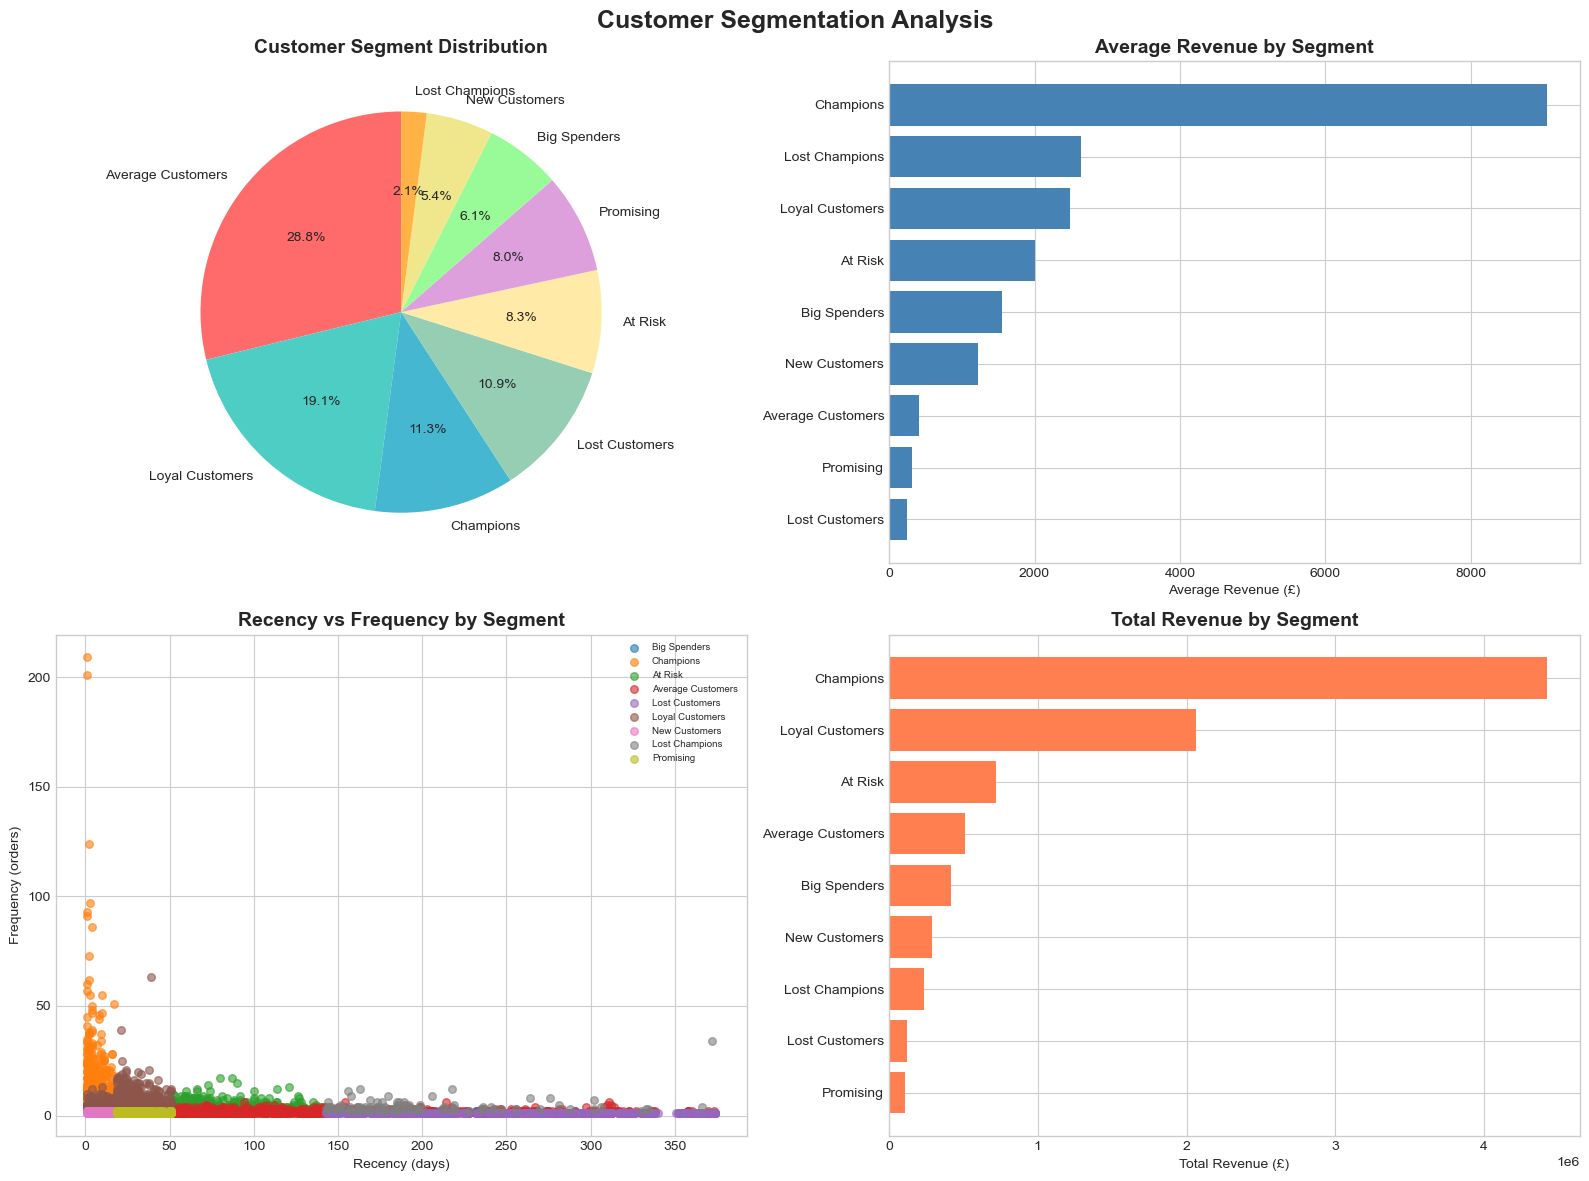

 Saved: visualizations/03_rfm_segments.png


In [35]:
# Create 4 visualizations in one figure
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Customer Segmentation Analysis', 
             fontsize=18, fontweight='bold')

# Chart 1: Segment Distribution (Pie Chart)
segment_counts = rfm['Segment'].value_counts()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', 
          '#FFEAA7', '#DDA0DD', '#98FB98', '#F0E68C', '#FFB347']

axes[0,0].pie(segment_counts.values, 
              labels=segment_counts.index,
              colors=colors[:len(segment_counts)],
              autopct='%1.1f%%',
              startangle=90)
axes[0,0].set_title('Customer Segment Distribution', 
                     fontsize=14, fontweight='bold')

# Chart 2: Average Revenue by Segment
segment_revenue = rfm.groupby('Segment')['Monetary'].mean().sort_values(ascending=True)
axes[0,1].barh(range(len(segment_revenue)), 
               segment_revenue.values,
               color='steelblue')
axes[0,1].set_yticks(range(len(segment_revenue)))
axes[0,1].set_yticklabels(segment_revenue.index)
axes[0,1].set_title('Average Revenue by Segment', 
                      fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Average Revenue (£)')

# Chart 3: Recency vs Frequency Scatter
colors_map = {seg: colors[i] for i, seg in 
              enumerate(rfm['Segment'].unique())}
for segment in rfm['Segment'].unique():
    data = rfm[rfm['Segment'] == segment]
    axes[1,0].scatter(data['Recency'], 
                      data['Frequency'],
                      label=segment, 
                      alpha=0.6, s=30)
axes[1,0].set_title('Recency vs Frequency by Segment',
                     fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Recency (days)')
axes[1,0].set_ylabel('Frequency (orders)')
axes[1,0].legend(loc='upper right', fontsize=7)

# Chart 4: Total Revenue by Segment
segment_total = rfm.groupby('Segment')['Monetary'].sum().sort_values(ascending=True)
axes[1,1].barh(range(len(segment_total)), 
               segment_total.values,
               color='coral')
axes[1,1].set_yticks(range(len(segment_total)))
axes[1,1].set_yticklabels(segment_total.index)
axes[1,1].set_title('Total Revenue by Segment', 
                      fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Total Revenue (£)')

plt.tight_layout()
plt.savefig('visualizations/03_rfm_segments.png', 
            dpi=300, bbox_inches='tight')
plt.show()

print(" Saved: visualizations/03_rfm_segments.png")

In [39]:
print("-" * 80)
print("BUSINESS RECOMMENDATIONS BY SEGMENT")
print("-" * 80)

recommendations = {
    'Champions': {
        'action': 'Reward them! They are your best customers.',
        'strategy': 'Offer exclusive early access, loyalty rewards, VIP programs'
    },
    'Loyal Customers': {
        'action': 'Upsell higher value products',
        'strategy': 'Recommend premium products, offer loyalty points'
    },
    'New Customers': {
        'action': 'Build relationship early',
        'strategy': 'Welcome emails, onboarding offers, first purchase discounts'
    },
    'At Risk': {
        'action': 'WIN THEM BACK urgently!',
        'strategy': 'Send personalized reactivation offers, ask for feedback'
    },
    'Lost Champions': {
        'action': 'Attempt reactivation',
        'strategy': 'Send "We miss you" campaigns with special discounts'
    },
    'Promising': {
        'action': 'Convert to loyal customers',
        'strategy': 'Targeted campaigns to increase purchase frequency'
    },
    'Lost Customers': {
        'action': 'Last chance campaign or let go',
        'strategy': 'Big discount offer, if no response - remove from campaigns'
    }
}

for segment, info in recommendations.items():
    if segment in rfm['Segment'].values:
        count = len(rfm[rfm['Segment']==segment])
        revenue = rfm[rfm['Segment']==segment]['Monetary'].sum()
        print(f"\n{'-'*60}")
        print(f"{segment} ({count} customers | £{revenue:,.2f} revenue)")
        print(f"Action:   {info['action']}")
        print(f"Strategy: {info['strategy']}")

--------------------------------------------------------------------------------
BUSINESS RECOMMENDATIONS BY SEGMENT
--------------------------------------------------------------------------------

------------------------------------------------------------
Champions (489 customers | £4,424,373.61 revenue)
Action:   Reward them! They are your best customers.
Strategy: Offer exclusive early access, loyalty rewards, VIP programs

------------------------------------------------------------
Loyal Customers (828 customers | £2,064,321.56 revenue)
Action:   Upsell higher value products
Strategy: Recommend premium products, offer loyalty points

------------------------------------------------------------
New Customers (234 customers | £286,914.79 revenue)
Action:   Build relationship early
Strategy: Welcome emails, onboarding offers, first purchase discounts

------------------------------------------------------------
At Risk (360 customers | £721,301.63 revenue)
Action:   WIN THEM BACK 

In [43]:
# Save complete RFM analysis
rfm.to_csv('outputs/rfm_analysis.csv', index=False)

print("-" * 80)
print("RFM ANALYSIS COMPLETE!")
print("-" * 80)
print(f"\nSaved: outputs/rfm_analysis.csv")
print(f"\nFINAL SUMMARY:")
print(f"Total customers analyzed: {len(rfm):,}")
print(f"Customer segments created: {rfm['Segment'].nunique()}")
print(f"Total revenue analyzed: £{rfm['Monetary'].sum():,.2f}")
print(f"\nSegment Breakdown:")
for segment, count in rfm['Segment'].value_counts().items():
    pct = count/len(rfm)*100
    revenue = rfm[rfm['Segment']==segment]['Monetary'].sum()
    print(f"   {segment:20}: {count:4} customers ({pct:.1f}%) | £{revenue:,.2f}")

--------------------------------------------------------------------------------
RFM ANALYSIS COMPLETE!
--------------------------------------------------------------------------------

Saved: outputs/rfm_analysis.csv

FINAL SUMMARY:
Total customers analyzed: 4,338
Customer segments created: 9
Total revenue analyzed: £8,887,208.89

Segment Breakdown:
   Average Customers   : 1250 customers (28.8%) | £513,340.88
   Loyal Customers     :  828 customers (19.1%) | £2,064,321.56
   Champions           :  489 customers (11.3%) | £4,424,373.61
   Lost Customers      :  473 customers (10.9%) | £119,364.01
   At Risk             :  360 customers (8.3%) | £721,301.63
   Promising           :  349 customers (8.0%) | £108,823.65
   Big Spenders        :  266 customers (6.1%) | £414,289.67
   New Customers       :  234 customers (5.4%) | £286,914.79
   Lost Champions      :   89 customers (2.1%) | £234,479.09
